Here I'll just grab a single point in the sky and look at what some possible light curves could look like. This could be handy if one wanted to test and refine some algorithms for deciding how good a light curve is.

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import ipykernel as ik
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import ipykernel as ik
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
print 'test'

test


In [10]:
outDir ='LightCurve'
dbFile = 'enigma_1189_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)
print 'aaaa'

aaaa


In [11]:
print 'test3'
filters = ['u','g','r','i','z','y']
colors={'u':'cyan','g':'g','r':'y','i':'r','z':'m', 'y':'k'}

test3


**Parameters to set**

In [199]:
# Set RA, Dec for a single point in the sky. in radians.
#ra = np.radians(0.)
#dec = np.radians(0.)
#ra = np.radians(240.012) #pos1
#dec = np.radians(-61.8795)
#ra = np.radians(349.386) #pos2
#dec = np.radians(-63.321)
#ra = np.radians(349.386) #deep1
#dec = np.radians(-63.32100)
#ra = np.radians(190) #pos3
#dec = np.radians(-83)
#ra = np.radians(20) #pos4
#dec = np.radians(-83)
#ra = np.radians(80) #pos5
#dec = np.radians(-40)
#ra = np.radians(120) #pos5a
#dec = np.radians(-50)
#ra = np.radians(280) #pos6
#dec = np.radians(-40)
#ra = np.radians(30.00) #pos7
#dec = np.radians(-20.00)
#ra = np.radians(100) #pos8
#dec = np.radians(-20)
#ra = np.radians(50.00) #pos9
#dec = np.radians(1.5)
#ra = np.radians(330.00) #pos10
#dec = np.radians(+1.5)
#ra = np.radians(190.00) #pos11 (not good)
#dec = np.radians(20.00)
#ra = np.radians(320.00) #pos11a  (N spur)
#dec = np.radians(5.00)
#ra = np.radians(60) #pos11b 
#dec = np.radians(5.00)
#ra = np.radians(60) #pos11c 
#dec = np.radians(10.00)
ra = np.radians(320) #pos11d (not good)
dec = np.radians(10.00)
#ra = np.radians(60) #pos14a
#dec = np.radians(30.00)
#ra = np.radians(10.00) #pos12
#dec = np.radians(+20.0)
# SNR limit (Don't use points below this limit)
snrLimit = 5.
# Demand this many points above SNR limit before plotting LC
nPtsLimit = 6
print 'aaaaau'

aaaaau


In [200]:
# The pass metric just passes data straight through.
metric = metrics.PassMetric(cols=['filter','fiveSigmaDepth','expMJD'])
slicer = slicers.UserPointsSlicer(ra,dec,lonCol='ditheredRA',latCol='ditheredDec')
sql = 'night < 365'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)
print 'testtest'
print 'testtest5'

testtest
testtest5


In [201]:
print 'test2'
bg.runAll()

test2
Querying database with constraint night < 365
Found 271946 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [202]:
bundle.metricValues.data[0]['filter']
print 'test3'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [203]:
dayZero = bundle.metricValues.data[0]['expMJD'].min()
print dayZero
for fname in filters:
    good = np.where(bundle.metricValues.data[0]['filter'] == fname)
    plt.scatter(bundle.metricValues.data[0]['expMJD'][good]- dayZero, 
                bundle.metricValues.data[0]['fiveSigmaDepth'][good],
                c = colors[fname], label=fname)
plt.xlabel('Day')
plt.ylabel('5$\sigma$ depth')
plt.legend(scatterpoints=1, loc="upper left", bbox_to_anchor=(1,1))
print 'aau'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [198]:
print '%i Observations total at this point (All SNR levels)' % bundle.metricValues.data[0].size
for fname in filters:
    good = np.where(bundle.metricValues.data[0]['filter'] == fname)
    print '%i Observations in %s' % (good[0].size, fname)

80 Observations total at this point (All SNR levels)
4 Observations in u
7 Observations in g
9 Observations in r
18 Observations in i
24 Observations in z
18 Observations in y


In [182]:
data = bundle.metricValues.data[0]
peakTime = 15
transDuration = peakTime+30 # Days
#peaks = {'uPeak':25.9, 'gPeak':23.6, 'rPeak':22.6, 'iPeak':22.7, 'zPeak':22.7,'yPeak':22.8}
peaks = {'uPeak':23.9, 'gPeak':23.6, 'rPeak':22.6, 'iPeak':22.7, 'zPeak':22.7,'yPeak':22.1}
#peaks = {'uPeak':23.9, 'gPeak':25.0, 'rPeak':24.7, 'iPeak':24.0, 'zPeak':23.3,'yPeak':22.1}
transMetric = metrics.TransientMetric(riseSlope= -2./peakTime, declineSlope=1.4/30.0, 
                                      transDuration=transDuration, peakTime=peakTime, 
                                      surveyDuration=10, **peaks)
#print dayZero
#dayZero = dayZero + 60
lc = transMetric.lightCurve((data['expMJD']-dayZero) % transDuration, data['filter'])
snr = utils.m52snr(lc,data['fiveSigmaDepth'])
lc_err = 2.5*np.log10(1.+1./snr)
print 'uuu'
print dayZero

uuu
49551.434698


0.0
1.0
2.0
3.0
4.0
Fraction of LCs that meet criteria and plotted = 3/4
auauu


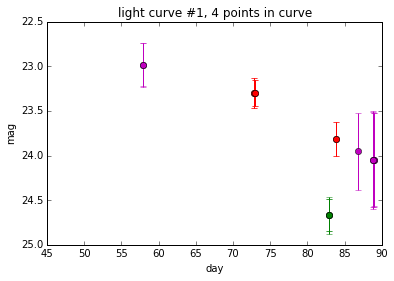

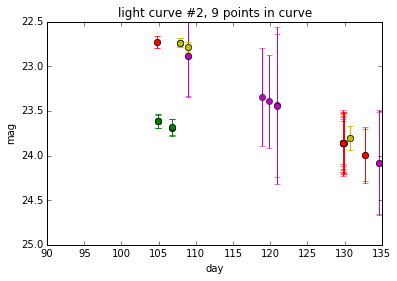

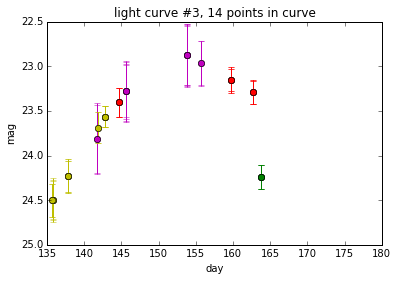

In [183]:
numOfLCs = np.ceil((data['expMJD'].max()-data['expMJD'].min())/transDuration)
plotCounter = 0
nPtsLimit = 1
for lcn in np.arange(0,numOfLCs+1,1):
    print lcn
    goodinTime = np.where(( data['expMJD'] >= data['expMJD'].min()+transDuration*lcn)
                       & ( data['expMJD'] <= data['expMJD'].min()+transDuration*(1+lcn))
                       & (snr > snrLimit))
    if goodinTime[0].size >= nPtsLimit:
        plotCounter += 1
        plt.figure()
        # Counter
        numPoints = 0
        for filterName in filters:
            good = np.where((data['filter'] == filterName) & 
                            ( data['expMJD'] >= data['expMJD'].min()+transDuration*lcn)
                           & ( data['expMJD'] <= data['expMJD'].min()+transDuration*(1+lcn))
                           & (snr > snrLimit))
            goodinTime = np.where(( data['expMJD'] >= data['expMJD'].min()+transDuration*lcn)
                       & ( data['expMJD'] <= data['expMJD'].min()+transDuration*(1+lcn))
                       & (data['filter'] == filterName))
            plt.errorbar(data['expMJD'][good]-dayZero, lc[good], yerr=lc_err[good], 
                         c=colors[filterName], marker='o', linestyle='None')
            plt.errorbar(data['expMJD'][goodinTime]-dayZero, lc[goodinTime], 
                         yerr=lc_err[goodinTime], 
                         c=colors[filterName], marker='o', linestyle='None')
          
            
            numPoints += good[0].size
        explodeDate=data['expMJD'].min()+transDuration*lcn
        plt.xlim([explodeDate-dayZero,explodeDate+transDuration-dayZero])
        plt.xlabel('day')
        plt.ylabel('mag')
        plt.title('light curve #%i, %i points in curve ' % (lcn, numPoints))
        plt.ylim([25., 22.5])
print 'Fraction of LCs that meet criteria and plotted = %i/%i' % (plotCounter, numOfLCs)
print 'auauu'

In [184]:
colors

{'g': 'g', 'i': 'r', 'r': 'y', 'u': 'cyan', 'y': 'k', 'z': 'm'}

Let's do it for something really bright, just to see all the points in the light curves

In [185]:
data = bundle.metricValues.data[0]
peakTime = 15
transDuration = peakTime+30 # Days
peaks = {'uPeak':20, 'gPeak':20, 'rPeak':20, 'iPeak':20, 'zPeak':20,'yPeak':20}
#peaks = {'uPeak':23.9, 'gPeak':25.0, 'rPeak':24.7, 'iPeak':24.0, 'zPeak':23.3,'yPeak':22.1}

transMetric = metrics.TransientMetric(riseSlope= 0, declineSlope=0, 
                                      transDuration=transDuration, peakTime=peakTime, 
                                      surveyDuration=10, **peaks)
lc = transMetric.lightCurve((data['expMJD']-dayZero) % transDuration, data['filter'])
snr = utils.m52snr(lc,data['fiveSigmaDepth'])
lc_err = 2.5*np.log10(1.+1./snr)
print 'testua'

testua


Fraction of LCs that meet criteria and plotted = 4/4


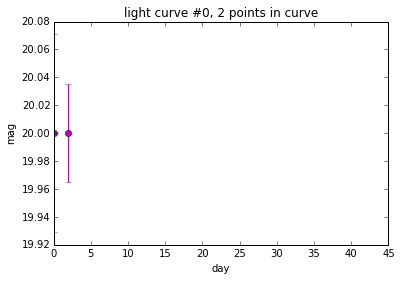

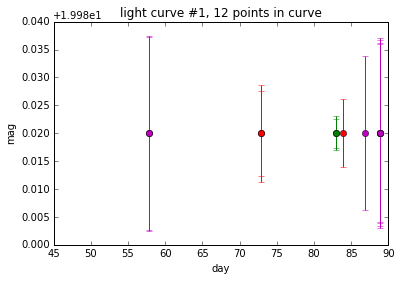

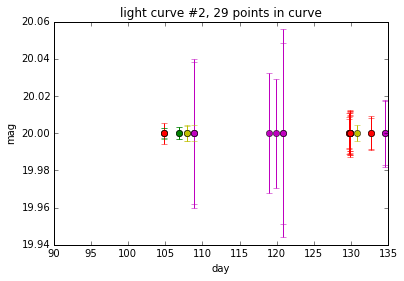

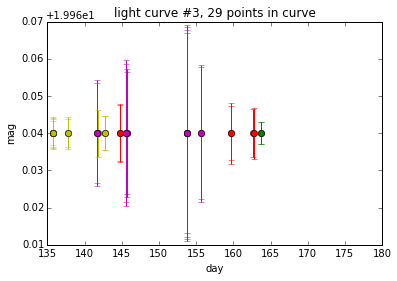

In [186]:
numOfLCs = np.ceil((data['expMJD'].max()-data['expMJD'].min())/transDuration)
plotCounter = 0
for lcn in np.arange(0,numOfLCs+1,1):
    good = np.where(( data['expMJD'] >= data['expMJD'].min()+transDuration*lcn)
                       & ( data['expMJD'] <= data['expMJD'].min()+transDuration*(1+lcn))
                       & (snr > snrLimit))
    if good[0].size >= nPtsLimit:
        plotCounter += 1
        plt.figure()
        # Counter
        numPoints = 0
        for filterName in filters:
            # print filterName
            good = np.where((data['filter'] == filterName) & 
                            ( data['expMJD'] >= data['expMJD'].min()+transDuration*lcn)
                           & ( data['expMJD'] <= data['expMJD'].min()+transDuration*(1+lcn))
                           & (snr > snrLimit))
            plt.errorbar(data['expMJD'][good]-dayZero, lc[good], yerr=lc_err[good], 
                         c=colors[filterName], marker='o', linestyle='None')
            numPoints += good[0].size
        explodeDate=data['expMJD'].min()+transDuration*lcn
        plt.xlim([explodeDate-dayZero,explodeDate+transDuration-dayZero])
        plt.xlabel('day')
        plt.ylabel('mag')
        plt.title('light curve #%i, %i points in curve ' % (lcn, numPoints))
print 'Fraction of LCs that meet criteria and plotted = %i/%i' % (plotCounter, numOfLCs)